# The Battle of Neighborhoods 
## Classification of areas into residential and commercial  
**(Applied Data Science Capstone Project)**

## 1. Introduction/Business Problem:

Bengaluru is the capital of the Indian state of Karnataka. It has a population of more than 11 million, making it the third most populous city and fifth most populous urban agglomeration in India. Located in southern India on the Deccan Plateau, at a height of over 900 m (3,000 ft) above sea level, Bangalore is known for its pleasant climate throughout the year. The city is also widely regarded as the "Silicon Valley of India" (or "IT capital of India") because of its role as the nation's leading information technology (IT) exporter. Indian technological organisations such as ISRO, Infosys, Wipro and HAL are headquartered in the city. A demographically diverse city, Bangalore is the second fastest-growing major metropolis in India. Recent estimates of the metro economy of its urban area have ranked Bangalore either the fourth or fifth-most productive metro area of India. It is home to many educational and research institutions in India. Numerous state-owned aerospace and defence organisations, such as Bharat Electronics, Hindustan Aeronautics and National Aerospace Laboratories are located in the city. The city also houses the Kannada film industry.


Owing to the factors mentioned above, there is high demand for residential apartments/bungalows/villas etc. (both rented/owned). And most of the time a newcomer in the city or someone who is trying to relocate within city doesn't know which place is good for staying and which is not based on personal criteria. As part of this project, we would try to answer this question - Which area is suitable for different cateogry of people. We will also try to answer whether the area is good for staying for bachelor's or for families.


We can classify people in different categories. E.g. - someone who loves native food (i.e Indian Food, or western food), someone who prefers other sort of entertainment, gym and fitness center etc. 


## 2. Data:
In order to answer the question, we will need following set of data:
1. Classification of areas of bangalore city into smaller area i.e. ward (a ward is an administrative unit of the city region;) 
2. Venue data (Malls, market, Supermarket, Parks, Schools, recreational activities, restaurants)

We will use following sources for above mentioned data categories
1. Ward data: https://opencity.in/data/bbmp-wards
2. Venue Data: Foursquare APIs


## 3. Import all the required libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

print('Libraries imported.')

Libraries imported.


## 4. Data Gathering
### A. Ward Data
#### A.1 Creating dataframe for the ward data

In [2]:
df_wards = pd.read_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\BBMP Ward Information with Map View   OpenCity.in.csv')
df_wards.head()

Ward No                 Ward Name BBMP Zone Name    BBMP Division  \
0        1           Kempegowda Ward      Yelahanka        Yelahanka   
1        2          Chowdeswari Ward      Yelahanka        Yelahanka   
2        3                    Atturu      Yelahanka        Yelahanka   
3        4  Yelahanka Satellite Town      Yelahanka        Yelahanka   
4        5                   Jakkuru      Yelahanka  Byatarayanapura   

  BBMP Sub Division Assembly constituency  MP Constituency  
0         Yelahanka             Yelahanka     Chikballapur  
1         Yelahanka             Yelahanka     Chikballapur  
2         Yelahanka             Yelahanka     Chikballapur  
3         Yelahanka             Yelahanka     Chikballapur  
4   Byatarayanapura       Byatarayanapura  Bangalore North

In [3]:
#reset the index to Ward No column
df_wards = df_wards.set_index('Ward No', drop = True)

# Clean the data 
## remove columns whicha are not required i.e. BBMP Zone Name, BBMP Division, BBMP Sub Division, Assembly constituency, MP Constituency
df_wards.drop(['BBMP Zone Name', 'BBMP Division','BBMP Sub Division', 'Assembly constituency', 'MP Constituency'], axis=1,inplace=True)

df_wards.head()


Ward Name
Ward No                          
1                 Kempegowda Ward
2                Chowdeswari Ward
3                          Atturu
4        Yelahanka Satellite Town
5                         Jakkuru

#### A.2 Get latitude and longitude coordinates of the Wards

In [4]:
# Correction in the names of wards based on city knowledge and internet search
df_wards.loc[18,'Ward Name'] = 'Radhakrishna Temple'
df_wards.loc[58,'Ward Name'] = 'New TippaSandra'
df_wards.loc[60,'Ward Name'] = 'Sagayarapuram'
df_wards.loc[61,'Ward Name'] = 'S K Garden'
df_wards.loc[63,'Ward Name'] = 'JayaMahal'
df_wards.loc[64,'Ward Name'] = 'RM Guttahalli'
df_wards.loc[73,'Ward Name'] = 'Kottigepalya'
df_wards.loc[90,'Ward Name'] = 'Halasuru'
df_wards.loc[108,'Ward Name'] = 'Sriramamandir'
df_wards.loc[115,'Ward Name'] = 'VannarPet'
df_wards.loc[118,'Ward Name'] = 'Sudhama Nagar'
df_wards.loc[121,'Ward Name'] = 'Binnipete'
df_wards.loc[140,'Ward Name'] = 'Chamrajpet'
df_wards.loc[160,'Ward Name'] = 'RR Nagar'
df_wards.loc[166,'Ward Name'] = 'KariSandra'
df_wards.loc[168,'Ward Name'] = 'Pattabhirama Nagar'
df_wards.loc[169,'Ward Name'] = 'ByraSandra'
df_wards.loc[173,'Ward Name'] = 'JakkaSandra'
df_wards.loc[179,'Ward Name'] = 'Shakambari Nagar'
df_wards.loc[181,'Ward Name'] = 'Kumaraswamy Layout'
df_wards.loc[183,'Ward Name'] = 'ChikkalaSandra'
df_wards.loc[188,'Ward Name'] = 'Bilekahalli'
df_wards.loc[189,'Ward Name'] = 'HongaSandra'
df_wards.loc[191,'Ward Name'] = 'Singasandra'
df_wards.loc[195,'Ward Name'] = 'Konanakunte'

In [5]:
df_wards

Ward Name
Ward No                           
1                  Kempegowda Ward
2                 Chowdeswari Ward
3                           Atturu
4         Yelahanka Satellite Town
5                          Jakkuru
6                      Thanisandra
7                  Byatarayanapura
8                      Kodigehalli
9                   Vidyaranyapura
10               Dodda Bommasandra
11                   Kuvempu Nagar
12                     Shettihalli
13                     Mallasandra
14                     Bagalakunte
15                   T Dasarahalli
16                       Jalahalli
17                        J P Park
18             Radhakrishna Temple
19                    SanJayanagar
20                     Ganga Nagar
21                         Hebbala
22          Vishwanath Nagenahalli
23                        Nagavara
24                      HBR Layout
25                        Horamavu
26                Ramamurthy Nagar
27                      Banasavadi
28                    Kammanahalli
29                 Kacharkanahalli
30                Kadugondanahalli
31                    Kushal Nagar
32               Kaval Bairasandra
33                Manorayana Palya
34                    Gangenahalli
35                  Aramane Nagara
36                       Mattikere
37                   Yeshwanthpura
38                        HMT Ward
39                    Chokkasandra
40               Dodda Bidarakallu
41          Peenya Industrial Area
42              Lakshmi Devi Nagar
43                  Nandini Layout
44                 Marappana Palya
45                    Malleshwaram
46         Jayachamarajendra Nagar
47             Devara Jeevanahalli
48                Muneshwara Nagar
49                   Lingarajapura
50                  Benniganahalli
51                     Vijnanapura
52                        KR Puram
53                    Basavanapura
54                            Hudi
55                      Devasandra
56                  A Narayanapura
57                C.V. Raman Nagar
58                 New TippaSandra
59              Maruthi Seva Nagar
60                   Sagayarapuram
61                      S K Garden
62                 Ramaswamy Palya
63                       JayaMahal
64                   RM Guttahalli
65            Kadu Malleshwar Ward
66                Subramanya Nagar
67                        Nagapura
68                Mahalakshmipuram
69                         Laggere
70                 Rajagopal Nagar
71                    Hegganahalli
72                       Herohalli
73                    Kottigepalya
74         Shakthi Ganapathi Nagar
75                    Shankar Matt
76                  Gayithri Nagar
77          Dattatreya Temple Ward
78                 Pulakeshi Nagar
79                  Sarvagna Nagar
80                   Hoysala Nagar
81                   Vijnana Nagar
82                Garudachar palya
83                        Kadugodi
84                         Hagadur
85                  Dodda Nekkundi
86                    Marathahalli
87                     HAL Airport
88               Jeevanbhima Nagar
89                       Jogupalya
90                        Halasuru
91                  Bharathi Nagar
92                   Shivaji Nagar
93                   Vasanth Nagar
94                    Gandhi Nagar
95                   Subhash Nagar
96                      Okalipuram
97                 Dayananda Nagar
98                   Prakash Nagar
99                    Rajaji Nagar
100             Basaveshwara Nagar
101                  Kamakshipalya
102           Vrisahbhavathi Nagar
103                     Kaveripura
104              Govindaraja Nagar
105           Agrahara Dasarahalli
106              Dr.Raj Kumar Ward
107                    Shiva Nagar
108                  Sriramamandir
109                      Chickpete
110              Sampangiram Nagar
111                 Shantala Nagar
112                         Domlur
113                Konena Agrahara


In [6]:
# Capturing latitude and longitude coordinate of each ward
df_wards['latitude']=np.nan
df_wards['longitude']=np.nan

for i in df_wards.index:
    address = df_wards['Ward Name'][i] + ', Bengaluru, India'  
    print(address)
    geolocator = Nominatim(user_agent="BL_explorer")
    location = geolocator.geocode(address)
    if location == None:
        df_wards.loc[i, 'latitude'] = np.nan
        df_wards.loc[i,'longitude'] = np.nan
    else:
        df_wards.loc[i,'latitude'] = location.latitude
        df_wards.loc[i,'longitude'] = location.longitude

df_wards.head()

Kempegowda Ward, Bengaluru, India
Chowdeswari Ward, Bengaluru, India
Atturu, Bengaluru, India
Yelahanka Satellite Town, Bengaluru, India
Jakkuru, Bengaluru, India
Thanisandra, Bengaluru, India
Byatarayanapura, Bengaluru, India
Kodigehalli, Bengaluru, India
Vidyaranyapura, Bengaluru, India
Dodda Bommasandra, Bengaluru, India
Kuvempu Nagar, Bengaluru, India
Shettihalli, Bengaluru, India
Mallasandra, Bengaluru, India
Bagalakunte, Bengaluru, India
T Dasarahalli, Bengaluru, India
Jalahalli, Bengaluru, India
J P Park, Bengaluru, India
Radhakrishna Temple, Bengaluru, India
SanJayanagar, Bengaluru, India
Ganga Nagar, Bengaluru, India
Hebbala, Bengaluru, India
Vishwanath Nagenahalli, Bengaluru, India
Nagavara, Bengaluru, India
HBR Layout, Bengaluru, India
Horamavu, Bengaluru, India
Ramamurthy Nagar, Bengaluru, India
Banasavadi, Bengaluru, India
Kammanahalli, Bengaluru, India
Kacharkanahalli, Bengaluru, India
Kadugondanahalli, Bengaluru, India
Kushal Nagar, Bengaluru, India
Kaval Bairasandra, Be

Ward Name   latitude  longitude
Ward No                                                
1                 Kempegowda Ward  12.956432  77.574119
2                Chowdeswari Ward  13.120459  77.579618
3                          Atturu  13.316973  77.930483
4        Yelahanka Satellite Town  13.089139  77.582717
5                         Jakkuru  13.098320  77.625146

In [7]:
# check for missing values
a = df_wards['latitude'].isnull()
a.value_counts()

False    193
True       5
Name: latitude, dtype: int64

In [8]:
# dropping missing values 
df_wards = df_wards.dropna().reset_index()
df_wards

Ward No                  Ward Name   latitude  longitude
0          1            Kempegowda Ward  12.956432  77.574119
1          2           Chowdeswari Ward  13.120459  77.579618
2          3                     Atturu  13.316973  77.930483
3          4   Yelahanka Satellite Town  13.089139  77.582717
4          5                    Jakkuru  13.098320  77.625146
5          6                Thanisandra  13.054713  77.633926
6          7            Byatarayanapura  13.062074  77.596392
7          8                Kodigehalli  13.060113  77.576773
8          9             Vidyaranyapura  13.076641  77.557732
9         10          Dodda Bommasandra  13.056340  77.557118
10        11              Kuvempu Nagar  13.073193  77.541713
11        12                Shettihalli  12.961250  78.065697
12        13                Mallasandra  13.109199  77.954131
13        14                Bagalakunte  13.059800  77.499883
14        15              T Dasarahalli  13.045141  77.514789
15        16                  Jalahalli  13.046453  77.548380
16        18        Radhakrishna Temple  13.033687  77.575665
17        19               SanJayanagar  13.033560  77.575898
18        20                Ganga Nagar  13.023247  77.588357
19        21                    Hebbala  13.038325  77.589063
20        22     Vishwanath Nagenahalli  13.034010  77.607704
21        23                   Nagavara  13.031436  77.617592
22        24                 HBR Layout  13.035870  77.632360
23        25                   Horamavu  13.027331  77.660151
24        26           Ramamurthy Nagar  13.012022  77.677782
25        27                 Banasavadi  13.015546  77.650715
26        28               Kammanahalli  13.009346  77.637709
27        29            Kacharkanahalli  13.019958  77.633948
28        30           Kadugondanahalli  13.020703  77.621546
29        31               Kushal Nagar  13.018785  77.615114
30        32          Kaval Bairasandra  13.028397  77.611513
31        33           Manorayana Palya  13.028933  77.601642
32        34               Gangenahalli  13.017426  77.587883
33        35             Aramane Nagara  13.016400  77.572878
34        36                  Mattikere  12.883104  77.182771
35        37              Yeshwanthpura  13.025609  77.554107
36        38                   HMT Ward  13.030442  77.533591
37        39               Chokkasandra  13.038175  77.507538
38        40          Dodda Bidarakallu  13.018085  77.485935
39        41     Peenya Industrial Area  13.019567  77.509589
40        42         Lakshmi Devi Nagar  13.019667  77.528040
41        43             Nandini Layout  13.010406  77.537803
42        45               Malleshwaram  13.002735  77.570325
43        46    Jayachamarajendra Nagar  13.015621  77.595221
44        47        Devara Jeevanahalli  13.015830  77.603112
45        48           Muneshwara Nagar  13.014081  77.611474
46        49              Lingarajapura  13.009586  77.626755
47        50             Benniganahalli  12.994919  77.662603
48        51                Vijnanapura  13.005338  77.669363
49        52                   KR Puram  13.007516  77.695935
50        53               Basavanapura  13.017903  77.720615
51        54                       Hudi  12.998786  77.730841
52        55                 Devasandra  13.001198  77.688193
53        56             A Narayanapura  12.993195  77.670377
54        57           C.V. Raman Nagar  12.985648  77.664977
55        58            New TippaSandra  13.055151  77.118758
56        59         Maruthi Seva Nagar  13.000561  77.630008
57        60              Sagayarapuram  13.005330  77.616294
58        61                 S K Garden  13.005562  77.608356
59        62            Ramaswamy Palya  13.006307  77.599353
60        63                  JayaMahal  12.998812  77.597579
61        64              RM Guttahalli  12.999849  77.584038
62        65       Kadu Malleshwar Ward  13.002445  77.566169
63        66           Subramanya Nag

In [9]:
df_wards.shape

(193, 4)

In [10]:
# create map of Bengaluru using latitude and longitude values
map_bangaluru = folium.Map(location=[12.9791198, 77.5912997], zoom_start=12)

# add markers to map
for lat, lng, ward in zip(df_wards['latitude'], df_wards['longitude'], df_wards['Ward Name']):
#     dist = postalcode[1:3]
    label = '{}'.format(ward)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangaluru)  
    
map_bangaluru

From the map, it is clear that there are some wrong latitude and longitude coordinate which should be removed before moving ahead.

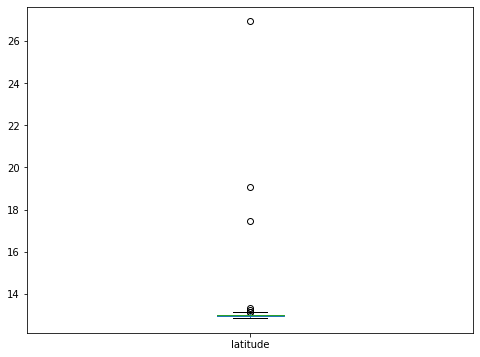

In [11]:
df_wards['latitude'].plot(kind='box', figsize=(8, 6))

Outliers are confirmed by the box plot.

In [12]:
# Latitude outlier removal treatment

df_wards1 = df_wards.copy(deep = True)
df_lat = df_wards[["latitude"]].copy()
Q1 = df_lat["latitude"].quantile(0.25)
Q3 = df_lat["latitude"].quantile(0.75)
IQR = Q3 - Q1
outlier = (df_lat["latitude"] < (Q1 - 1.5 * IQR)) | (df_lat["latitude"] > (Q3 + 1.5 * IQR))
print("Total number of outlier are: ", outlier.sum(axis=0))
df_lat[outlier]=np.nan
# median_Temperature = df_temperature["Temperature(F)"].median()
# df_temperature["Temperature(F)"].replace(np.nan, median_Temperature, inplace=True)
df_wards1[["latitude"]] = df_lat[["latitude"]].copy()
df_wards1 = df_wards1.dropna().reset_index(drop=True)

# Longitude outlier removal treatment
df_lng = df_wards[["longitude"]].copy()
Q1 = df_lng["longitude"].quantile(0.25)
Q3 = df_lng["longitude"].quantile(0.75)
IQR = Q3 - Q1
outlier = (df_lng["longitude"] < (Q1 - 1.5 * IQR)) | (df_lng["longitude"] > (Q3 + 1.5 * IQR))
print("Total number of outlier are: ", outlier.sum(axis=0))
df_lng[outlier]=np.nan
df_wards1[["longitude"]] = df_lng[["longitude"]].copy()
df_wards1 = df_wards1.dropna().reset_index(drop=True)

Total number of outlier are:  7
Total number of outlier are:  14


In [13]:
df_wards1

Ward No                  Ward Name   latitude  longitude
0          1            Kempegowda Ward  12.956432  77.574119
1          2           Chowdeswari Ward  13.120459  77.579618
2          5                    Jakkuru  13.098320  77.582717
3          6                Thanisandra  13.054713  77.625146
4          7            Byatarayanapura  13.062074  77.633926
5          8                Kodigehalli  13.060113  77.596392
6          9             Vidyaranyapura  13.076641  77.576773
7         10          Dodda Bommasandra  13.056340  77.557732
8         11              Kuvempu Nagar  13.073193  77.557118
9         12                Shettihalli  12.961250  77.541713
10        15              T Dasarahalli  13.045141  77.499883
11        16                  Jalahalli  13.046453  77.514789
12        18        Radhakrishna Temple  13.033687  77.548380
13        19               SanJayanagar  13.033560  77.575665
14        20                Ganga Nagar  13.023247  77.575898
15        21                    Hebbala  13.038325  77.588357
16        22     Vishwanath Nagenahalli  13.034010  77.589063
17        23                   Nagavara  13.031436  77.607704
18        24                 HBR Layout  13.035870  77.617592
19        25                   Horamavu  13.027331  77.632360
20        26           Ramamurthy Nagar  13.012022  77.660151
21        27                 Banasavadi  13.015546  77.677782
22        28               Kammanahalli  13.009346  77.650715
23        29            Kacharkanahalli  13.019958  77.637709
24        30           Kadugondanahalli  13.020703  77.633948
25        31               Kushal Nagar  13.018785  77.621546
26        32          Kaval Bairasandra  13.028397  77.615114
27        33           Manorayana Palya  13.028933  77.611513
28        34               Gangenahalli  13.017426  77.601642
29        35             Aramane Nagara  13.016400  77.587883
30        36                  Mattikere  12.883104  77.572878
31        38                   HMT Ward  13.030442  77.554107
32        39               Chokkasandra  13.038175  77.533591
33        40          Dodda Bidarakallu  13.018085  77.507538
34        41     Peenya Industrial Area  13.019567  77.485935
35        42         Lakshmi Devi Nagar  13.019667  77.509589
36        43             Nandini Layout  13.010406  77.528040
37        45               Malleshwaram  13.002735  77.537803
38        46    Jayachamarajendra Nagar  13.015621  77.570325
39        47        Devara Jeevanahalli  13.015830  77.595221
40        48           Muneshwara Nagar  13.014081  77.603112
41        49              Lingarajapura  13.009586  77.611474
42        50             Benniganahalli  12.994919  77.626755
43        51                Vijnanapura  13.005338  77.662603
44        52                   KR Puram  13.007516  77.669363
45        53               Basavanapura  13.017903  77.695935
46        54                       Hudi  12.998786  77.720615
47        55                 Devasandra  13.001198  77.730841
48        56             A Narayanapura  12.993195  77.688193
49        57           C.V. Raman Nagar  12.985648  77.670377
50        58            New TippaSandra  13.055151  77.664977
51        60              Sagayarapuram  13.005330  77.630008
52        61                 S K Garden  13.005562  77.616294
53        62            Ramaswamy Palya  13.006307  77.608356
54        63                  JayaMahal  12.998812  77.599353
55        64              RM Guttahalli  12.999849  77.597579
56        65       Kadu Malleshwar Ward  13.002445  77.584038
57        66           Subramanya Nagar  13.008009  77.566169
58        67                   Nagapura  13.001202  77.557241
59        68           Mahalakshmipuram  13.001202  77.546024
60        69                    Laggere  13.010868  77.546024
61        70            Rajagopal Nagar  13.006752  77.520730
62        71               Hegganahalli  12.999409  77.511354
63        72                  Herohal

In [14]:
# create map of Bengaluru using latitude and longitude values
map_bangaluru = folium.Map(location=[12.9791198, 77.5912997], zoom_start=12)

# add markers to map
for lat, lng, ward in zip(df_wards1['latitude'], df_wards1['longitude'], df_wards1['Ward Name']):
    label = '{}'.format(ward)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangaluru)  
    
map_bangaluru

In [15]:
df_wards_final = df_wards1.copy(deep=True)
df_wards_final.head()

Ward No         Ward Name   latitude  longitude
0        1   Kempegowda Ward  12.956432  77.574119
1        2  Chowdeswari Ward  13.120459  77.579618
2        5           Jakkuru  13.098320  77.582717
3        6       Thanisandra  13.054713  77.625146
4        7   Byatarayanapura  13.062074  77.633926

In [16]:
df_wards_final.to_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\df_wards_final.csv')

### B Venue Data
#### B.1 Get the data from Foursquare

In [17]:
CLIENT_ID = 'SUVIVZ0AYV430ODOFKDIKR4KETK0WJNPFNJ10TGRBLINTNQE' # your Foursquare ID
CLIENT_SECRET = '3XYQFXOGQ4S2Z14M0QHBAH3CZ4ZFHE3ZFDL2DQXB4AJG3QE0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius, LIMIT):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward Name', 
                  'Ward Latitude', 
                  'Ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
Bengaluru_venues = getNearbyVenues(names=df_wards_final['Ward Name'],
                                   latitudes=df_wards_final['latitude'],
                                   longitudes=df_wards_final['longitude'],
                                   radius = 1000,
                                   LIMIT = 80)

print('Venues fetching for analysis is completed successfully')

Kempegowda Ward
Chowdeswari Ward
Jakkuru
Thanisandra
Byatarayanapura
Kodigehalli
Vidyaranyapura
Dodda Bommasandra
Kuvempu Nagar
Shettihalli
T Dasarahalli
Jalahalli
Radhakrishna Temple
SanJayanagar
Ganga Nagar
Hebbala
Vishwanath Nagenahalli
Nagavara
HBR Layout
Horamavu
Ramamurthy Nagar
Banasavadi
Kammanahalli
Kacharkanahalli
Kadugondanahalli
Kushal Nagar
Kaval Bairasandra
Manorayana Palya
Gangenahalli
Aramane Nagara
Mattikere
HMT Ward
Chokkasandra
Dodda Bidarakallu
Peenya Industrial Area
Lakshmi Devi Nagar
Nandini Layout
Malleshwaram
Jayachamarajendra Nagar
Devara Jeevanahalli
Muneshwara Nagar
Lingarajapura
Benniganahalli
Vijnanapura
KR Puram
Basavanapura
Hudi
Devasandra
A Narayanapura
C.V. Raman Nagar
New TippaSandra
Sagayarapuram
S K Garden
Ramaswamy Palya
JayaMahal
RM Guttahalli
Kadu Malleshwar Ward
Subramanya Nagar
Nagapura
Mahalakshmipuram
Laggere
Rajagopal Nagar
Hegganahalli
Herohalli
Kottigepalya
Shakthi Ganapathi Nagar
Shankar Matt
Dattatreya Temple Ward
Sarvagna Nagar
Hoysala N

In [20]:
print('{} venues are collected'.format(Bengaluru_venues.shape[0]))

print('There are {} uniques categories.'.format(len(Bengaluru_venues['Venue Category'].unique())))

4168 venues are collected
There are 229 uniques categories.


In [22]:
Bengaluru_venues.to_csv(r"C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Bengaluru_venues.csv")

## 5. Ward Level Analysis
let's analyse each ward.

In [23]:
Bengaluru_venues = pd.read_csv(r"C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Bengaluru_venues.csv")

In [24]:
Bengaluru_venues.shape

(4168, 8)

In [25]:
print(Bengaluru_venues["Venue Category"].value_counts())
Bengaluru_venues["Venue Category"].value_counts().to_csv(r"C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Category.csv")


Indian Restaurant                  710
Café                               269
Fast Food Restaurant               190
Ice Cream Shop                     150
Coffee Shop                        127
Pizza Place                        126
Department Store                   112
Bakery                             104
Chinese Restaurant                 104
Hotel                               83
Vegetarian / Vegan Restaurant       77
Snack Place                         72
Clothing Store                      68
Park                                61
Restaurant                          59
Pub                                 55
Sandwich Place                      54
Asian Restaurant                    53
Breakfast Spot                      50
Shopping Mall                       46
South Indian Restaurant             46
Bus Station                         44
Lounge                              41
Juice Bar                           41
Dessert Shop                        39
Bar                      

The number of categories are high and thus needs to be consolidated for our analysis.
Note: New categories are consolidate outside the jupyter notebook and needs to be imported using csv file.

In [26]:
df_new_category = pd.read_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Category - Modified.csv')
df_new_category.drop('Unnamed: 3',axis=1, inplace = True)
df_new_category

Venue Category  Count               New Venue Category
0                  Indian Restaurant    735                Indian Restaurant
1                               Café    284             Snacks & Refreshment
2               Fast Food Restaurant    192                        Fast Food
3                     Ice Cream Shop    151                           Desert
4                        Coffee Shop    131             Snacks & Refreshment
5                        Pizza Place    127                        Fast Food
6                   Department Store    115                      SuperMarket
7                 Chinese Restaurant    111            International Cousine
8                             Bakery    108             Snacks & Refreshment
9                              Hotel     94                            Hotel
10     Vegetarian / Vegan Restaurant     77                Indian Restaurant
11                       Snack Place     75             Snacks & Refreshment
12                    Clothing Store     72                   Clothing Store
13                              Park     61                             Park
14                        Restaurant     61                Indian Restaurant
15                               Pub     59                       Night Life
16                    Sandwich Place     55             Snacks & Refreshment
17                  Asian Restaurant     54            International Cousine
18                    Breakfast Spot     51             Snacks & Refreshment
19                     Shopping Mall     49                             Mall
20           South Indian Restaurant     46                Indian Restaurant
21                            Lounge     45                       Night Life
22                       Bus Station     45                           Travel
23                         Juice Bar     45             Snacks & Refreshment
24                               Bar     43                       Night Life
25                      Dessert Shop     42                           Desert
26                Italian Restaurant     40            International Cousine
27                               Gym     39     Sports, Gym & Fitness Center
28                          Tea Room     34             Snacks & Refreshment
29                 Electronics Store     33  Electronics and Home Appliances
30                           Brewery     31                       Night Life
31                Seafood Restaurant     30                Indian Restaurant
32                        Donut Shop     30                        Fast Food
33                         BBQ Joint     28            International Cousine
34                         Multiplex     27                    Entertainment
35                             Diner     26            International Cousine
36                               ATM     25                              ATM
37                      Burger Joint     24                        Fast Food
38                Mexican Restaurant     22            International Cousine
39                        Food Truck     22                        Fast Food
40              Gym / Fitness Center     21     Sports, Gym & Fitness Center
41                        Steakhouse     20                        Fast Food
42                 Convenience Store     20    Groceries & Convenience Store
43                 Andhra Restaurant     20                Indian Restaurant
44                     Movie Theater     19                    Entertainment
45                         Bookstore     17                   Other Services
46         Middle Eastern Restaurant     17            International Cousine
47          Mediterranean Restaurant     16            International Cousine
48                       Supermarket     16                      SuperMarket
49                Miscellaneous Shop     15                   Other Services
50                     Metro Station     14                           Travel
51                

In [27]:
df_Bengaluru_venues = pd.merge(Bengaluru_venues,  
         df_new_category,  
         on ='Venue Category',  
         how ='left')
df_Bengaluru_venues.drop(["Unnamed: 0","Venue Category","Count"],axis = 1, inplace = True)
df_Bengaluru_venues

Ward Name  Ward Latitude  Ward Longitude  \
0               Kempegowda Ward      12.956432       77.574119   
1               Kempegowda Ward      12.956432       77.574119   
2               Kempegowda Ward      12.956432       77.574119   
3               Kempegowda Ward      12.956432       77.574119   
4               Kempegowda Ward      12.956432       77.574119   
5               Kempegowda Ward      12.956432       77.574119   
6               Kempegowda Ward      12.956432       77.574119   
7               Kempegowda Ward      12.956432       77.574119   
8               Kempegowda Ward      12.956432       77.574119   
9               Kempegowda Ward      12.956432       77.574119   
10              Kempegowda Ward      12.956432       77.574119   
11              Kempegowda Ward      12.956432       77.574119   
12              Kempegowda Ward      12.956432       77.574119   
13              Kempegowda Ward      12.956432       77.574119   
14              Kempegowda Ward      12.956432       77.574119   
15              Kempegowda Ward      12.956432       77.574119   
16              Kempegowda Ward      12.956432       77.574119   
17              Kempegowda Ward      12.956432       77.574119   
18              Kempegowda Ward      12.956432       77.574119   
19              Kempegowda Ward      12.956432       77.574119   
20              Kempegowda Ward      12.956432       77.574119   
21              Kempegowda Ward      12.956432       77.574119   
22              Kempegowda Ward      12.956432       77.574119   
23              Kempegowda Ward      12.956432       77.574119   
24              Kempegowda Ward      12.956432       77.574119   
25             Chowdeswari Ward      13.120459       77.579618   
26             Chowdeswari Ward      13.120459       77.579618   
27             Chowdeswari Ward      13.120459       77.579618   
28             Chowdeswari Ward      13.120459       77.579618   
29             Chowdeswari Ward      13.120459       77.579618   
30                      Jakkuru      13.098320       77.582717   
31                      Jakkuru      13.098320       77.582717   
32                      Jakkuru      13.098320       77.582717   
33                      Jakkuru      13.098320       77.582717   
34                      Jakkuru      13.098320       77.582717   
35                      Jakkuru      13.098320       77.582717   
36                      Jakkuru      13.098320       77.582717   
37                      Jakkuru      13.098320       77.582717   
38                      Jakkuru      13.098320       77.582717   
39                      Jakkuru      13.098320       77.582717   
40                      Jakkuru      13.098320       77.582717   
41                      Jakkuru      13.098320       77.582717   
42                      Jakkuru      13.098320       77.582717   
43                      Jakkuru      13.098320       77.582717   
44                      Jakkuru      13.098320       77.582717   
45                      Jakkuru      13.098320       77.582717   
46                      Jakkuru      13.098320       77.582717   
47                      Jakkuru      13.098320       77.582717   
48                      Jakkuru      13.098320       77.582717   
49                  Thanisandra      13.054713       77.625146   
50                  Thanisandra      13.054713       77.625146   
51                  Thanisandra      13.054713       77.625146   
52                  Thanisandra      13.054713       77.625146   
53                  Thanisandra      13.054713       77.625146   
54                  Thanisandra      13.054713       77.625146   
55                  Thanisandra      13.054713       77.625146   
56                  Thanisandra      13.054713       77.625146   
57                  Thanisandra      13.054713       77.625146   
58                  Thanisandra      13.054713       77.625146   
59              Byatarayanapura      13.062074       77.633926

In [28]:
# one hot encoding
Bengaluru_onehot = pd.get_dummies(df_Bengaluru_venues[['New Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bengaluru_onehot['Ward Name'] = df_Bengaluru_venues['Ward Name'] 

# move neighborhood column to the first column
fixed_columns = [Bengaluru_onehot.columns[-1]] + list(Bengaluru_onehot.columns[:-1])
Bengaluru_onehot = Bengaluru_onehot[fixed_columns]

Bengaluru_onehot.head()

Ward Name  ATM  Automobile  Clothing Store  Desert  \
0  Kempegowda Ward    0           0               0       0   
1  Kempegowda Ward    0           0               0       0   
2  Kempegowda Ward    0           0               0       0   
3  Kempegowda Ward    0           0               0       0   
4  Kempegowda Ward    0           0               0       0   

   Electronics and Home Appliances  Entertainment  Fast Food  Fuel  Furniture  \
0                                0              0          0     0          0   
1                                0              0          0     0          0   
2                                0              0          0     0          0   
3                                0              0          0     0          0   
4                                0              1          0     0          0   

   Groceries & Convenience Store  Hotel  Indian Restaurant  \
0                              0      0                  0   
1                              0      0                  0   
2                              0      0                  0   
3                              0      0                  0   
4                              0      0                  0   

   International Cousine  Liquor Store  Mall  Night Life  Other  \
0                      0             0     0           0      0   
1                      0             0     0           0      0   
2                      0             0     0           0      0   
3                      0             0     0           0      0   
4                      0             0     0           0      0   

   Other Services  Park  Pharmacy  Salon, Cosmetics & Jewellery  \
0               0     0         0                             0   
1               0     0         0                             0   
2               0     0         0                             0   
3               0     0         0                             0   
4               0     0         0                             0   

   Snacks & Refreshment  Sports, Gym & Fitness Center  Stationary   Store  \
0                     1                             0            0      0   
1                     1                             0            0      0   
2                     1                             0            0      0   
3                     1                             0            0      0   
4                     0                             0            0      0   

   SuperMarket  Travel  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0

**Next, let's group rows by wards and by taking the mean of the frequency of occurrence of each category**

In [29]:
Bengaluru_grouped = Bengaluru_onehot.groupby('Ward Name').mean().reset_index()
Bengaluru_grouped

Ward Name       ATM  Automobile  Clothing Store  \
0               A Narayanapura  0.000000    0.000000        0.071429   
1                      Adugodi  0.000000    0.000000        0.027778   
2                       Agaram  0.000000    0.000000        0.000000   
3         Agrahara Dasarahalli  0.000000    0.000000        0.000000   
4                   Anjanapura  0.000000    0.000000        0.000000   
5                      Arakere  0.500000    0.000000        0.000000   
6               Aramane Nagara  0.000000    0.000000        0.000000   
7                    Attiguppe  0.000000    0.000000        0.000000   
8                   Azad Nagar  0.000000    0.000000        0.000000   
9                   BTM Layout  0.000000    0.012500        0.037500   
10                  Banasavadi  0.000000    0.000000        0.000000   
11    Banashankari Temple Ward  0.000000    0.032258        0.000000   
12                Bapuji Nagar  0.750000    0.000000        0.000000   
13                Basavanagudi  0.000000    0.000000        0.000000   
14                Basavanapura  0.000000    0.000000        0.000000   
15          Basaveshwara Nagar  0.000000    0.019231        0.076923   
16                       Begur  0.400000    0.000000        0.000000   
17                  Bellanduru  0.000000    0.000000        0.027027   
18              Benniganahalli  0.000000    0.000000        0.100000   
19                 Bilekahalli  0.000000    0.000000        0.000000   
20                   Binnipete  0.000000    0.000000        0.025000   
21             Byatarayanapura  0.000000    0.000000        0.000000   
22            C.V. Raman Nagar  0.000000    0.000000        0.000000   
23                  Chamrajpet  0.000000    0.000000        0.000000   
24                   Chickpete  0.000000    0.000000        0.000000   
25              ChikkalaSandra  0.000000    0.000000        0.000000   
26                Chokkasandra  0.000000    0.000000        0.000000   
27            Chowdeswari Ward  0.000000    0.000000        0.000000   
28                  Cottonpete  0.000000    0.000000        0.050000   
29      Dattatreya Temple Ward  0.000000    0.000000        0.045455   
30             Dayananda Nagar  0.000000    0.000000        0.000000   
31            Deepanjali Nagar  0.000000    0.000000        0.000000   
32         Devara Jeevanahalli  0.000000    0.000000        0.000000   
33                  Devasandra  0.000000    0.000000        0.000000   
34     Dharmaraya Swamy Temple  0.000000    0.000000        0.064516   
35           Dodda Bidarakallu  0.000000    0.000000        0.000000   
36           Dodda Bommasandra  0.000000    0.000000        0.000000   
37                      Domlur  0.000000    0.000000        0.000000   
38           Dr.Raj Kumar Ward  0.000000    0.000000        0.000000   
39                     Ejipura  0.000000    0.000000        0.000000   
40   Gali Anjenaya Temple Ward  0.000000    0.000000        0.000000   
41                Gandhi Nagar  0.000000    0.000000        0.056604   
42          Ganesh Mandir Ward  0.000000    0.000000        0.000000   
43                 Ganga Nagar  0.000000    0.000000        0.000000   
44                Gangenahalli  0.000000    0.000000        0.000000   
45            Garudachar palya  0.000000    0.000000        0.000000   
46                  Giri Nagar  0.000000    0.000000        0.000000   
47                   Gottigere  0.000000    0.000000        0.000000   
48           Govindaraja Nagar  0.000000    0.000000        0.000000   
49             Gurappana Palya  0.000000    0.000000        0.000000   
50                 HAL Airport  0.000000    0.000000        0.000000   
51                  HBR Layout  0.000000    0.000000        0.000000   
52                    HMT Ward  0.000000    0.000000        0.000000   
53                  HSR Layout  0.000000    0.000000        0.013699   
54                     Hagadur  0.000000    0.038462        0

In [30]:
Bengaluru_grouped.to_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\Bengaluru_grouped.csv')

**First, let's write a function to sort the venues in descending order.**

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Now let's create a new dataframe and display the top 10 venues for each district.**

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward Name']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
ward_venues_sorted = pd.DataFrame(columns=columns)
ward_venues_sorted['Ward Name'] = Bengaluru_grouped['Ward Name']

for idx in np.arange(Bengaluru_grouped.shape[0]):
    ward_venues_sorted.iloc[idx, 1:] = return_most_common_venues(Bengaluru_grouped.iloc[idx, :], num_top_venues)

In [33]:
ward_venues_sorted

Ward Name         1st Most Common Venue  \
0               A Narayanapura         International Cousine   
1                      Adugodi          Snacks & Refreshment   
2                       Agaram          Snacks & Refreshment   
3         Agrahara Dasarahalli             Indian Restaurant   
4                   Anjanapura                        Travel   
5                      Arakere                           ATM   
6               Aramane Nagara             Indian Restaurant   
7                    Attiguppe             Indian Restaurant   
8                   Azad Nagar                     Fast Food   
9                   BTM Layout             Indian Restaurant   
10                  Banasavadi             Indian Restaurant   
11    Banashankari Temple Ward             Indian Restaurant   
12                Bapuji Nagar                           ATM   
13                Basavanagudi          Snacks & Refreshment   
14                Basavanapura             Indian Restaurant   
15          Basaveshwara Nagar             Indian Restaurant   
16                       Begur                           ATM   
17                  Bellanduru             Indian Restaurant   
18              Benniganahalli          Snacks & Refreshment   
19                 Bilekahalli          Snacks & Refreshment   
20                   Binnipete                    Night Life   
21             Byatarayanapura             Indian Restaurant   
22            C.V. Raman Nagar             Indian Restaurant   
23                  Chamrajpet                        Travel   
24                   Chickpete             Indian Restaurant   
25              ChikkalaSandra          Snacks & Refreshment   
26                Chokkasandra                        Travel   
27            Chowdeswari Ward             Indian Restaurant   
28                  Cottonpete         International Cousine   
29      Dattatreya Temple Ward                     Fast Food   
30             Dayananda Nagar             Indian Restaurant   
31            Deepanjali Nagar             Indian Restaurant   
32         Devara Jeevanahalli             Indian Restaurant   
33                  Devasandra          Snacks & Refreshment   
34     Dharmaraya Swamy Temple         International Cousine   
35           Dodda Bidarakallu                 Entertainment   
36           Dodda Bommasandra             Indian Restaurant   
37                      Domlur          Snacks & Refreshment   
38           Dr.Raj Kumar Ward          Snacks & Refreshment   
39                     Ejipura          Snacks & Refreshment   
40   Gali Anjenaya Temple Ward             Indian Restaurant   
41                Gandhi Nagar         International Cousine   
42          Ganesh Mandir Ward                     Fast Food   
43                 Ganga Nagar             Indian Restaurant   
44                Gangenahalli                 Entertainment   
45            Garudachar palya          Snacks & Refreshment   
46                  Giri Nagar                    Night Life   
47                   Gottigere             Indian Restaurant   
48           Govindaraja Nagar             Indian Restaurant   
49             Gurappana Palya             Indian Restaurant   
50                 HAL Airport             Indian Restaurant   
51                  HBR Layout             Indian Restaurant   
52                    HMT Ward             Indian Restaurant   
53                  HSR Layout             Indian Restaurant   
54                     Hagadur             Indian Restaurant   
55                    Halasuru             Indian Restaurant   
56                 Hampi Nagar          Snacks & Refreshment   
57             Hanumanth Nagar             Indian Restaurant   
58                     Hebbala                        Travel   
59                Hegganahalli                           ATM   
60                 Hemmigepura                        Travel   
61                   Herohalli                       

In [34]:
ward_venues_sorted.to_csv(r'C:\Users\sagar.gawali\Analytics\9. Capstone Project\week 5\ward_venues_sorted.csv')

## 6. Cluster Wards of Bengaluru City

### 6.A Optimal K value selection using elbow method
In order to run k-means to cluster the wards, we need to identify optimul cluster number.

In [35]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,100) 

Bengaluru_grouped_clustering = Bengaluru_grouped.drop('Ward Name', 1)


for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Bengaluru_grouped_clustering) 
    kmeanModel.fit(Bengaluru_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(Bengaluru_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Bengaluru_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Bengaluru_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Bengaluru_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

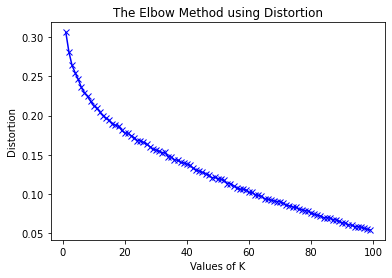

In [36]:
# Plot the distortions
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

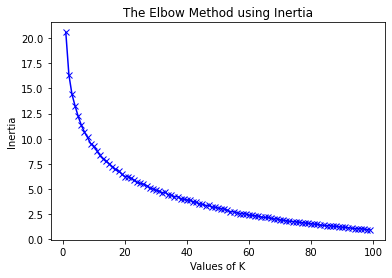

In [37]:
# Plot the intertias
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

To determine the optimal number of clusters, we should select the value of k at the “elbow” i.e. the point after which the distortion/inertia start decreasing in a linear fashion. However, looking at the the graph, we don't see any elbow point and thus ***don't have any  optimal number of clusters*** for the data.

As a result, the code was executed with different values of K and looking at the different clusters, we concluded that K = 4 provides the business wise optimal value. 

### 6.B Performing Clustering 

In [38]:
# set number of clusters
kclusters = 4

Bengaluru_grouped_clustering = Bengaluru_grouped.drop('Ward Name', 1)
print(Bengaluru_grouped_clustering.shape)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bengaluru_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

(172, 27)


array([1, 0, 0, 2, 1, 3, 2, 2, 1, 2])

In [39]:
# add clustering labels
# ward_venues_sorted.drop('Cluster Labels',axis =1, inplace = True)
ward_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [40]:
df_Bengaluru_merged = pd.merge(df_wards_final,  ward_venues_sorted, on = 'Ward Name', how = 'left')

df_Bengaluru_merged


Ward No                  Ward Name   latitude  longitude  Cluster Labels  \
0          1            Kempegowda Ward  12.956432  77.574119               2   
1          2           Chowdeswari Ward  13.120459  77.579618               2   
2          5                    Jakkuru  13.098320  77.582717               2   
3          6                Thanisandra  13.054713  77.625146               0   
4          7            Byatarayanapura  13.062074  77.633926               2   
5          8                Kodigehalli  13.060113  77.596392               0   
6          9             Vidyaranyapura  13.076641  77.576773               1   
7         10          Dodda Bommasandra  13.056340  77.557732               0   
8         11              Kuvempu Nagar  13.073193  77.557118               0   
9         12                Shettihalli  12.961250  77.541713               0   
10        15              T Dasarahalli  13.045141  77.499883               1   
11        16                  Jalahalli  13.046453  77.514789               1   
12        18        Radhakrishna Temple  13.033687  77.548380               1   
13        19               SanJayanagar  13.033560  77.575665               0   
14        20                Ganga Nagar  13.023247  77.575898               2   
15        21                    Hebbala  13.038325  77.588357               1   
16        22     Vishwanath Nagenahalli  13.034010  77.589063               2   
17        23                   Nagavara  13.031436  77.607704               1   
18        24                 HBR Layout  13.035870  77.617592               2   
19        25                   Horamavu  13.027331  77.632360               2   
20        26           Ramamurthy Nagar  13.012022  77.660151               2   
21        27                 Banasavadi  13.015546  77.677782               2   
22        28               Kammanahalli  13.009346  77.650715               0   
23        29            Kacharkanahalli  13.019958  77.637709               2   
24        30           Kadugondanahalli  13.020703  77.633948               0   
25        31               Kushal Nagar  13.018785  77.621546               0   
26        32          Kaval Bairasandra  13.028397  77.615114               1   
27        33           Manorayana Palya  13.028933  77.611513               1   
28        34               Gangenahalli  13.017426  77.601642               1   
29        35             Aramane Nagara  13.016400  77.587883               2   
30        36                  Mattikere  12.883104  77.572878               2   
31        38                   HMT Ward  13.030442  77.554107               1   
32        39               Chokkasandra  13.038175  77.533591               1   
33        40          Dodda Bidarakallu  13.018085  77.507538               1   
34        41     Peenya Industrial Area  13.019567  77.485935               3   
35        42         Lakshmi Devi Nagar  13.019667  77.509589               1   
36        43             Nandini Layout  13.010406  77.528040               3   
37        45               Malleshwaram  13.002735  77.537803               0   
38        46    Jayachamarajendra Nagar  13.015621  77.570325               0   
39        47        Devara Jeevanahalli  13.015830  77.595221               2   
40        48           Muneshwara Nagar  13.014081  77.603112               1   
41        49              Lingarajapura  13.009586  77.611474               2   
42        50             Benniganahalli  12.994919  77.626755               0   
43        51                Vijnanapura  13.005338  77.662603               2   
44        52                   KR Puram  13.007516  77.669363               2   
45        53               Basavanapura  13.017903  77.695935               2   
46        54                       Hudi  12.998786  77.720615               0   
47        55                 Devasandra  13.001198  77.730841               0   
48        56             A Narayanap

In [41]:
df_Bengaluru_merged['Cluster Labels'].value_counts()

0    73
2    56
1    33
3    10
Name: Cluster Labels, dtype: int64

### 6.C Plot the clusters on the map
Finally, let's visualize the resulting clusters

In [42]:
# create map
map_clusters = folium.Map(location=[12.9791198, 77.5912997], zoom_start=12)

# set colors
rainbow = ['blue', 'red', 'black','green']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Bengaluru_merged['latitude'], df_Bengaluru_merged['longitude'], df_Bengaluru_merged['Ward Name'], df_Bengaluru_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 7. Examine Clusters
### Cluster 1

In [43]:
cluster1 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 0, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster1

Ward Name         1st Most Common Venue  \
3                  Thanisandra          Snacks & Refreshment   
5                  Kodigehalli             Indian Restaurant   
7            Dodda Bommasandra             Indian Restaurant   
8                Kuvempu Nagar  Sports, Gym & Fitness Center   
9                  Shettihalli          Snacks & Refreshment   
13                SanJayanagar             Indian Restaurant   
22                Kammanahalli          Snacks & Refreshment   
24            Kadugondanahalli             Indian Restaurant   
25                Kushal Nagar          Snacks & Refreshment   
37                Malleshwaram          Snacks & Refreshment   
38     Jayachamarajendra Nagar                  Liquor Store   
42              Benniganahalli          Snacks & Refreshment   
46                        Hudi                        Travel   
47                  Devasandra          Snacks & Refreshment   
52                  S K Garden             Indian Restaurant   
54                   JayaMahal                 Entertainment   
55               RM Guttahalli                 Entertainment   
56        Kadu Malleshwar Ward             Indian Restaurant   
57            Subramanya Nagar             Indian Restaurant   
58                    Nagapura             Indian Restaurant   
59            Mahalakshmipuram             Indian Restaurant   
66                Shankar Matt                        Desert   
67      Dattatreya Temple Ward                     Fast Food   
69               Hoysala Nagar             Indian Restaurant   
70               Vijnana Nagar             Indian Restaurant   
71            Garudachar palya          Snacks & Refreshment   
77                    Halasuru             Indian Restaurant   
79                Gandhi Nagar         International Cousine   
80               Subhash Nagar          Snacks & Refreshment   
82               Prakash Nagar          Snacks & Refreshment   
85               Kamakshipalya             Indian Restaurant   
88           Dr.Raj Kumar Ward          Snacks & Refreshment   
90               Sriramamandir                     Fast Food   
96                      Agaram          Snacks & Refreshment   
97                   VannarPet          Snacks & Refreshment   
98                  Nilasandra             Indian Restaurant   
100              Sudhama Nagar             Indian Restaurant   
101    Dharmaraya Swamy Temple         International Cousine   
102                 Cottonpete         International Cousine   
103                  Binnipete                    Night Life   
107                Marenahalli                     Fast Food   
110                Nagarabhavi          Snacks & Refreshment   
113               Nayandahalli                    Automobile   
115                Hampi Nagar          Snacks & Refreshment   
117             Padarayanapura          Snacks & Refreshment   
118                  Rayapuram          Snacks & Refreshment   
119                  KR Market          Snacks & Refreshment   
122               Sunkenahalli          Snacks & Refreshment   
125           Hombegowda Nagar             Indian Restaurant   
127                    Adugodi          Snacks & Refreshment   
128                    Ejipura          Snacks & Refreshment   
129                    Varthur          Snacks & Refreshment   
130                 Bellanduru             Indian Restaurant   
131                Koramangala             Indian Restaurant   
132           Suddagunte Palya          Snacks & Refreshment   
133               Basavanagudi          Snacks & Refreshment   
135                  Sri Nagar             Indian Restaurant   
136  Gali Anjenaya Temple Ward             Indian Restaurant   
138                    Kengeri                     Fast Food   
140              Hosakerehalli          Snacks & Refreshment   
143           Vidya Peeta Ward          Snacks & Refreshment   
145         Pattabhirama Nagar             Indian Res

### Cluster 2

In [44]:
cluster2 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 1, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster2

Ward Name         1st Most Common Venue  2nd Most Common Venue  \
6         Vidyaranyapura  Sports, Gym & Fitness Center                   Park   
10         T Dasarahalli  Sports, Gym & Fitness Center                 Travel   
11             Jalahalli                 Entertainment                 Travel   
12   Radhakrishna Temple                        Travel                  Hotel   
15               Hebbala                        Travel             Automobile   
17              Nagavara                   SuperMarket   Snacks & Refreshment   
26     Kaval Bairasandra                   SuperMarket   Snacks & Refreshment   
27      Manorayana Palya                   SuperMarket   Snacks & Refreshment   
28          Gangenahalli                 Entertainment      Indian Restaurant   
31              HMT Ward             Indian Restaurant                 Travel   
32          Chokkasandra                        Travel      Indian Restaurant   
33     Dodda Bidarakallu                 Entertainment              Fast Food   
35    Lakshmi Devi Nagar                 Entertainment              Fast Food   
40      Muneshwara Nagar                 Entertainment              Fast Food   
48        A Narayanapura         International Cousine          Entertainment   
51         Sagayarapuram          Snacks & Refreshment              Fast Food   
60               Laggere             Indian Restaurant          Entertainment   
72              Kadugodi                        Travel      Indian Restaurant   
76             Jogupalya                   SuperMarket                  Hotel   
86     Govindaraja Nagar             Indian Restaurant                 Travel   
89           Shiva Nagar                        Travel      Indian Restaurant   
92     Sampangiram Nagar             Indian Restaurant          Entertainment   
94                Domlur          Snacks & Refreshment          Entertainment   
106            Hosahalli             Indian Restaurant          Entertainment   
108  Maruthi Mandir Ward                 Entertainment              Fast Food   
112               Ullalu                        Travel                   Park   
120           Chamrajpet                        Travel   Snacks & Refreshment   
121           Azad Nagar                     Fast Food                 Travel   
141           Giri Nagar                    Night Life      Indian Restaurant   
142           Katriguppe                        Travel                 Desert   
144   Ganesh Mandir Ward                     Fast Food   Snacks & Refreshment   
169           Anjanapura                        Travel                  Other   
171          Hemmigepura                        Travel  International Cousine   

             3rd Most Common Venue         4th Most Common Venue  \
6                        Fast Food                        Travel   
10                            Park                    Automobile   
11               Indian Restaurant                     Fast Food   
12            Snacks & Refreshment                 Entertainment   
15                   Entertainment                Other Services   
17                        Pharmacy                     Fast Food   
26                        Pharmacy                     Fast Food   
27                        Pharmacy                     Fast Food   
28    Sports, Gym & Fitness Center                   SuperMarket   
31                       Fast Food         International Cousine   
32            Snacks & Refreshment                     Fast Food   
33                          Travel         International Cousine   
35                          Travel         International Cousine   
40               Indian Restaurant                        Travel   
48            Snacks & Refreshment                     Fast Food   
51   Groceries & Convenience Store                Clothing Store   
60           International Cousine                     Fast Food   
72                  Clothing Store  

### Cluster 3

In [45]:
cluster3 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 2, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster3

Ward Name 1st Most Common Venue  \
0             Kempegowda Ward     Indian Restaurant   
1            Chowdeswari Ward     Indian Restaurant   
2                     Jakkuru     Indian Restaurant   
4             Byatarayanapura     Indian Restaurant   
14                Ganga Nagar     Indian Restaurant   
16     Vishwanath Nagenahalli     Indian Restaurant   
18                 HBR Layout     Indian Restaurant   
19                   Horamavu     Indian Restaurant   
20           Ramamurthy Nagar     Indian Restaurant   
21                 Banasavadi     Indian Restaurant   
23            Kacharkanahalli     Indian Restaurant   
29             Aramane Nagara     Indian Restaurant   
30                  Mattikere     Indian Restaurant   
39        Devara Jeevanahalli     Indian Restaurant   
41              Lingarajapura     Indian Restaurant   
43                Vijnanapura     Indian Restaurant   
44                   KR Puram     Indian Restaurant   
45               Basavanapura     Indian Restaurant   
49           C.V. Raman Nagar     Indian Restaurant   
50            New TippaSandra         Entertainment   
53            Ramaswamy Palya     Indian Restaurant   
68             Sarvagna Nagar     Indian Restaurant   
73                    Hagadur     Indian Restaurant   
74                HAL Airport     Indian Restaurant   
75          Jeevanbhima Nagar     Indian Restaurant   
78              Vasanth Nagar     Indian Restaurant   
81            Dayananda Nagar     Indian Restaurant   
83               Rajaji Nagar     Indian Restaurant   
84         Basaveshwara Nagar     Indian Restaurant   
87       Agrahara Dasarahalli     Indian Restaurant   
91                  Chickpete     Indian Restaurant   
93             Shantala Nagar     Indian Restaurant   
95            Konena Agrahara     Indian Restaurant   
99              Shanthi Nagar     Indian Restaurant   
104        Kempapura Agrahara     Indian Restaurant   
105               ViJayanagar     Indian Restaurant   
109               Mudalapalya     Indian Restaurant   
111       Jnana Bharathi Ward     Indian Restaurant   
114                 Attiguppe     Indian Restaurant   
123        Vishveshwara Puram     Indian Restaurant   
124                 Siddapura     Indian Restaurant   
126               Lakkasandra     Indian Restaurant   
134           Hanumanth Nagar     Indian Restaurant   
137          Deepanjali Nagar     Indian Restaurant   
139                  RR Nagar     Indian Restaurant   
150                HSR Layout     Indian Restaurant   
151                BTM Layout     Indian Restaurant   
153          Shakambari Nagar     Indian Restaurant   
154  Banashankari Temple Ward     Indian Restaurant   
155        Kumaraswamy Layout     Indian Restaurant   
156          Padmanabha Nagar     Indian Restaurant   
163          Mangammana Palya     Indian Restaurant   
164               Singasandra     Indian Restaurant   
167                 Gottigere     Indian Restaurant   
168               Konanakunte     Indian Restaurant   
170               Vasanthpura     Indian Restaurant   

             2nd Most Common Venue          3rd Most Common Venue  \
0             Snacks & Refreshment                  Entertainment   
1                     Liquor Store           Snacks & Refreshment   
2             Snacks & Refreshment                         Desert   
4                         Pharmacy                    SuperMarket   
14           International Cousine                         Desert   
16            Snacks & Refreshment                     Automobile   
18                       Fast Food                         Travel   
19            Snacks & Refreshment                      Fast Food   
20            Snacks & Refreshment                    SuperMarket   
21                     SuperMarket                      Fast Food   
23           International Cousine           Snacks & Refreshment   
29            Snacks & Refreshment                      

### Cluster 4

In [46]:
cluster4 = df_Bengaluru_merged.loc[df_Bengaluru_merged['Cluster Labels'] == 3, df_Bengaluru_merged.columns[[1] + list(range(5, df_Bengaluru_merged.shape[1]))]]
cluster4

Ward Name 1st Most Common Venue  \
34    Peenya Industrial Area                   ATM   
36            Nandini Layout                   ATM   
61           Rajagopal Nagar                   ATM   
62              Hegganahalli                   ATM   
63                 Herohalli                   ATM   
64              Kottigepalya                   ATM   
65   Shakthi Ganapathi Nagar                   ATM   
116             Bapuji Nagar                   ATM   
165                    Begur                   ATM   
166                  Arakere                   ATM   

               2nd Most Common Venue  3rd Most Common Venue  \
34             International Cousine             Automobile   
36             International Cousine      Indian Restaurant   
61                         Fast Food  International Cousine   
62   Electronics and Home Appliances  International Cousine   
63                         Fast Food      Indian Restaurant   
64   Electronics and Home Appliances                   Fuel   
65                 Indian Restaurant                 Travel   
116                         Pharmacy  International Cousine   
165     Sports, Gym & Fitness Center   Snacks & Refreshment   
166     Sports, Gym & Fitness Center  International Cousine   

    4th Most Common Venue         5th Most Common Venue  \
34         Clothing Store                        Desert   
36             Automobile                Clothing Store   
61             Automobile                Clothing Store   
62             Automobile                Clothing Store   
63            SuperMarket         International Cousine   
64         Other Services         International Cousine   
65            Stationary   Sports, Gym & Fitness Center   
116            Automobile                Clothing Store   
165         Entertainment             Indian Restaurant   
166            Automobile                Clothing Store   

               6th Most Common Venue            7th Most Common Venue  \
34   Electronics and Home Appliances                    Entertainment   
36                            Desert  Electronics and Home Appliances   
61                            Desert  Electronics and Home Appliances   
62                            Desert                    Entertainment   
63                        Automobile                   Clothing Store   
64                        Automobile                   Clothing Store   
65                        Automobile                   Clothing Store   
116                           Desert  Electronics and Home Appliances   
165                       Automobile                   Clothing Store   
166                           Desert  Electronics and Home Appliances   

    8th Most Common Venue            9th Most Common Venue  \
34              Fast Food                             Fuel   
36          Entertainment                        Fast Food   
61          Entertainment                             Fuel   
62              Fast Food                             Fuel   
63                 Desert  Electronics and Home Appliances   
64                 Desert                    Entertainment   
65                 Desert  Electronics and Home Appliances   
116         Entertainment                        Fast Food   
165                Desert  Electronics and Home Appliances   
166         Entertainment                        Fast Food   

    10th Most Common Venue  
34               Furniture  
36                    Fuel  
61               Furniture  
62               Furniture  
63           Entertainment  
64               Fast Food  
65           Entertainment  
116                   Fuel  
165              Fast Food  
166                   Fuel

## 8. Results & Observations


Based on the data, every ward in the city was classified into one of the four clusters. This was achieved through unsupervised learning alogorithm of clustering using K- means. These four cluster were created from the data fetched from the foursqure API's related to venues. 


**Cluster 1:** In this cluster, first 3 'most common venues' are related to the food. 


**Cluster 2:** In this cluster, first 3 'most common venues' are related to Sports, Gym & Fitness Centre, Entertainment, Travel, Supermarket and restaurant, park etc


**Cluster 3:** In this cluster, first 3 'most common venues' are related to food and more specifically to Indian Restaurants, snack & refreshments and Groceries


**Cluster 4:** In this cluster, first 4 'most common venues' are related to ATM, Sports, Gym & Fitness Centre, Automobile


## 9. Conclusion:
1.	Based on clusters obtained and observations made, following conclusion can be drawn:

Cluster | Suitable for | 
--- | --- |
1 | For the people loving different types food or bachelors who love to eat outside instead of cooking at home |
2 | For the people who are extroverts, who love to go out and enjoy or families who need all rounded facilities like Gym, sports, entertainment, parks, easy travel arrangement for schools and offices|
3 | For the people who love traditional food or native food, mostly to the higher age people who are accustomed to the native/traditional food items |
4 | For the people who enjoys food prepared at home but like to go out for sports, gym and fitness center, have personal vehicles|


2.	Though these conclusions are drawn based on cluster, these don't feel distinctive clusters. Some of these clusters feel overlapping and clear demarcation is absent.


3.	Also, when we tried to identify optimal 'K' value for clustering using K-means, there was no clear output using elbow method.


4.	Foursquare venue data had different categories present, however some of the key categories were missing e.g. Hospitals, Schools, Banks, Parks, Day Care Centers and Amusement Parks in the locality. There is high presence of food related categories. Thus, clustering is heavily biased towards food category. More elaborate venue data is required for better analysis of the neighborhood.
